<a href="https://colab.research.google.com/github/Bdempsey03/DDoS_Prevention/blob/main/DDoS_Prevention_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import needed libraries

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import sklearn.metrics as sk_metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from google.colab import drive

# Import data

In [ ]:
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/DrDoS_UDP_clean.csv')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,56,57,58,59,60,61,62,63,64,Label
0,0,101418.0,2.886730e+09,43443.0,3.232248e+09,6652.0,17.0,1.543668e+09,218395.0,6.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,21564.0,2.886730e+09,54741.0,3.232248e+09,9712.0,17.0,1.543668e+09,108219.0,4.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,23389.0,2.886730e+09,56589.0,3.232248e+09,4680.0,17.0,1.543668e+09,104579.0,4.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,48872.0,2.886730e+09,40233.0,3.232248e+09,2644.0,17.0,1.543668e+09,110967.0,4.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,80354.0,2.886730e+09,33989.0,3.232248e+09,16901.0,17.0,1.543668e+09,1.0,2.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Split into test/train

In [ ]:
data_slice = data[80000:0000]
train_data = data_slice.sample(frac=0.75,random_state=1)
test_data = data_slice.drop(train_data.index)
#split label into Y
x_train, y_train = train_data.iloc[:, 2:-1], train_data.iloc[:, -1]
x_test, y_test = test_data.iloc[:, 2:-1], test_data.iloc[:, -1]


In [ ]:
# Make a logistic regression model using DDoS data

model = LogisticRegression(random_state=16)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Evaluate Model

In [ ]:
cnf_matrix = sk_metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

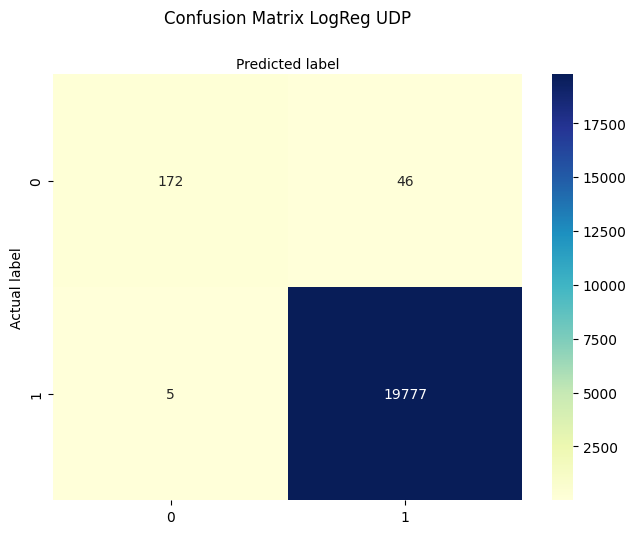

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix LogReg UDP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['Legitimate Traffic','DDoS Packets']
print(classification_report(y_test, y_pred, target_names=target_names))



                    precision    recall  f1-score   support

Legitimate Traffic       0.97      0.79      0.87       218
      DDoS Packets       1.00      1.00      1.00     19782

          accuracy                           1.00     20000
         macro avg       0.98      0.89      0.93     20000
      weighted avg       1.00      1.00      1.00     20000

